### Naive Bayes Classifier Algorithm

#### Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

#### It is mainly used in text classification that includes a high-dimensional training dataset.

#### Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

#### It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

#### Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

### Why is it called Naïve Bayes?

#### The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

#### Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

#### Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.

### Bayes' Theorem:

#### Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
#### The formula for Bayes' theorem is given as:

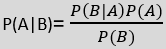

#### Naïve Bayes Classifier Algorithm

Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

### Working of Naïve Bayes' Classifier:

#### Working of Naïve Bayes' Classifier can be understood with the help of the below example:

#### Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions. So to solve this problem, we need to follow the below steps:

#### Convert the given dataset into frequency tables.
#### Generate Likelihood table by finding the probabilities of given features.
#### Now, use Bayes theorem to calculate the posterior probability.

Problem: If the weather is sunny, then the Player should play or not?

Solution: To solve this, first consider the below dataset:

### Applying Bayes'theorem:

P(Yes|Sunny)= P(Sunny|Yes)*P(Yes)/P(Sunny)

P(Sunny|Yes)= 3/10= 0.3

P(Sunny)= 0.35

P(Yes)=0.71

So P(Yes|Sunny) = 0.3*0.71/0.35= 0.60

P(No|Sunny)= P(Sunny|No)*P(No)/P(Sunny)

P(Sunny|NO)= 2/4=0.5

P(No)= 0.29

P(Sunny)= 0.35

So P(No|Sunny)= 0.5*0.29/0.35 = 0.41

So as we can see from the above calculation that P(Yes|Sunny)>P(No|Sunny)
### Hence on a Sunny day, Player can play the game.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Your data
data = {
    'Outlook': ['Rainy', 'Sunny', 'Overcast', 'Overcast', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Overcast', 'Overcast'],
    'Play': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Convert categorical variables to numeric
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Play'] = le.fit_transform(df['Play'])

# Split data into features (X) and target (y)
X = df[['Outlook']]
y = df['Play']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load data from CSV file
file_path = 'DataUpdated.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = data.drop('RV', axis=1)  # Features
y = data['RV']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Create a Naive Bayes Classifier (Gaussian Naive Bayes)
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score for test set
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")

# Perform cross-validation
cv_accuracy = cross_val_score(clf, X_scaled, y, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})")

Test Accuracy: 0.9292
Test Precision: 0.9318
Test Recall: 0.9292
Test F1 Score: 0.9294
Cross-Validation Accuracy: 0.9409 (+/- 0.0428)


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
#print(iris)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a Naive Bayes Classifier (Gaussian Naive Bayes)
clf = GaussianNB()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for training set
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
precision_train = metrics.precision_score(y_train, y_pred_train, average='weighted')
recall_train = metrics.recall_score(y_train, y_pred_train, average='weighted')
f1_score_train = metrics.f1_score(y_train, y_pred_train, average='weighted')

print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_score_train:.4f}")


# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
precision_test = metrics.precision_score(y_test, y_pred_test, average='weighted')
recall_test = metrics.recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = metrics.f1_score(y_test, y_pred_test, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_score_test:.4f}")



# Perform cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=10, scoring='accuracy')
cv_predictions = cross_val_predict(clf, X_scaled, y, cv=10)

# Calculate accuracy, precision, recall, and F1-score for each fold in cross-validation
for fold, (train_index, test_index) in enumerate(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_scaled, y)):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    y_pred_train = clf.predict(X_train_fold)
    y_pred_test_fold = clf.predict(X_test_fold)
    
    accuracy_train = metrics.accuracy_score(y_train_fold, y_pred_train)
    precision_train = metrics.precision_score(y_train_fold, y_pred_train, average='weighted')
    recall_train = metrics.recall_score(y_train_fold, y_pred_train, average='weighted')
    f1_score_train = metrics.f1_score(y_train_fold, y_pred_train, average='weighted')
    
    accuracy_test_fold = metrics.accuracy_score(y_test_fold, y_pred_test_fold)
    precision_test_fold = metrics.precision_score(y_test_fold, y_pred_test_fold, average='weighted')
    recall_test_fold = metrics.recall_score(y_test_fold, y_pred_test_fold, average='weighted')
    f1_score_test_fold = metrics.f1_score(y_test_fold, y_pred_test_fold, average='weighted')
    
    print(f"Fold {fold + 1} - Train Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1 Score: {f1_score_train:.4f}")
    print(f"Fold {fold + 1} - Test Accuracy: {accuracy_test_fold:.4f}, Precision: {precision_test_fold:.4f}, Recall: {recall_test_fold:.4f}, F1 Score: {f1_score_test_fold:.4f}")

# Calculate mean and standard deviation of cross-validation scores
print(f"\nMean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

Training Accuracy: 0.9429
Training Precision: 0.9429
Training Recall: 0.9429
Training F1 Score: 0.9429
Test Accuracy: 0.9778
Test Precision: 0.9794
Test Recall: 0.9778
Test F1 Score: 0.9777
Fold 1 - Train Accuracy: 0.9630, Precision: 0.9631, Recall: 0.9630, F1 Score: 0.9630
Fold 1 - Test Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1 Score: 0.9327
Fold 2 - Train Accuracy: 0.9556, Precision: 0.9556, Recall: 0.9556, F1 Score: 0.9556
Fold 2 - Test Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Fold 3 - Train Accuracy: 0.9481, Precision: 0.9483, Recall: 0.9481, F1 Score: 0.9481
Fold 3 - Test Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Fold 4 - Train Accuracy: 0.9630, Precision: 0.9631, Recall: 0.9630, F1 Score: 0.9630
Fold 4 - Test Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1 Score: 0.9327
Fold 5 - Train Accuracy: 0.9630, Precision: 0.9631, Recall: 0.9630, F1 Score: 0.9630
Fold 5 - Test Accuracy: 0.8667, Precision: 0.8667